#**Análise de RH**

Nesse projeto irei construir um modelo de Machine Learning que será capaz de classificar, de acordo com as características dos dados, a probabilidade de um funcionário(a) permanecer ou não na empresa. 

Esse tipo de aprendizado é conhecido como Aprendizado Supervisionado, pois a nossa variável alvo (left_Company) irá participar da aprendizagem do modelo. Esse modelo, como já foi dito, será um modelo de classificação e os algortimos utilizados serão o Random Forest Classifier e o KNeighbors Classifier.

Link do dataset utilizado: https://www.kaggle.com/krismurphy01/data-lab



## **Setup**

In [ ]:
#importando algumas bibliotecas necessárias
!pip install scikit-plot #instalando biblioteca para plot

import pandas as pd #tratamento e limpeza dos dados
import numpy as np #tratamento eficiente de dados numéricos

#plotar os gráficos
%matplotlib inline
import matplotlib.pyplot as plt  
import seaborn as sns
import scikitplot as skplt

#configurando o estilo dos gráficos
sns.set_style('darkgrid')
sns.set_palette('Accent')

#SEED
np.random.seed(42)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Dicionário de Colunas (informações retiradas do Kaggle):**


*   **ID:** Employee ID
*   **Name:** Employee Name
*   **Department:** The functional department that the employee belongs to.
*   **GEO:** The working geography that the employee belongs to in a matrix organization.
*   **Role:** The employee's position or title.
*   **Rising_Star:** Indicates the level of promise or promote-ability the employee has.
*   **Will_Relocate:** Is the employee willing to relocate?
*   **Critical:** Is the employee critical to the organization?
*   **Trending Perf:** How is the employee trending in performance this year?
*   **Talent_Level:** This field represents a subjective level of management's view of the employee.
*   **Validated_Talent_Level:** This field senior managements view of what the manager stated.
*   **Percent_Remote:** The percentage of the employee's work that is done remotely.
*   **EMP_Sat_OnPrem_1:** One indicator from a survey that was sent to employees by a third party. 
*   **EMP_Sat_Remote_1:** One indicator from a survey that was sent to employees by a third party. 
*   **EMP_Engagement_1:** One indicator from a survey that was sent to employees by a third party. Engagement represents the employee's 
*   **last_evaluation:** The score on the last employee evaluation.
*   **number_project:** The number of projects the employee works on throughout the year.
*   **average_montly_hours:** The average number of hours the employee works.
*   **time_spend_company:** Years of service.
*   **Work_accident:** The number of accidents the employee is involved in.
*   **left_Company:** Did the employee leave the company?
*   **CSR Factor** 
*   **promotion_last_5years:** Did the employee get promoted in last 5 years?
*   **sales**
*   **salary:** Relative pay grade (low, medium, high) by role.
*   **Gender:** Gender or how the ​person identifies.
*   **LinkedIn_Hits:** The number of times employee visits LinkedIn networking sites.
*   **Emp_Work_Status2:** One indicator from a survey that was sent to employees by a third party. Status represents how strongly employee
*   **Emp_Identity:** How the employee identifies themselves with the company.
*   **Emp_Role:** How the employee identifies themselves with the importance of their role in the company.
*   **Emp_Position:** How the employee identifies themselves with the importance of their position in the company.
*   **Emp_Title:** How the employee feels about their title.
*   **Women_Leave:** Women who left the company.
*   **Men_Leave:** Men who left the company.
*   **Emp_Competitive_1:** One indicator from a survey that was sent to employees by a third party. How employee feels about the
*   **Emp_Collaborative_1:** One indicator from a survey that was sent to employees by a third party. How employee feels about the
*   **Sensor_StepCount:** Sentient devices are used to capture certain employee activities. In this case number of steps.
*   **Sensor_Heartbeat(Average/Min):** Sentient devices are used to capture certain employee activities. In this case heartbeat.
*   **Sensor_Proximity(1-highest/10-lowest):** Sentient devices are used to capture certain employee activities. In this case how close they are to their company laptop.














## **Análise Exploratória de Dados**

A análise explortatória de dados é um dos primeiros passos em um projeto de Data Science, aqui iremos explorar e conhecer melhor os nossos dados, para em seguida construírmos um modelo de Machine Learning.

In [ ]:
#carregando os dados e visualizando as 5 primeiras entradas

df = pd.read_csv('HR_Engagement_Sat_Sales_UpdatedV4.0.csv')
df.head()

,ID,Name,Department,GEO,Role,Rising_Star,Will_Relocate,Critical,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,EMP_Sat_OnPrem_3,EMP_Sat_OnPrem_4,EMP_Sat_OnPrem_5,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,CSR Factor,promotion_last_5years,sales,salary,Gender,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Women_Leave,Men_Leave,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
0,1,BRADDY,Operations,US,VP,NaN,0,1.0,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,3,168,3,1,0,NaN,0,sales,low,M,5,4,3,1,1,1,1,2,1,NaN,1.0,2,4,2,2,2,2,2,2,1,5,1841,61,9
1,2,BORST,Sales,UK,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,5,159,2,0,0,NaN,0,accounting,low,F,58,3,3,4,3,2,1,2,1,0.0,NaN,2,2,1,4,1,3,2,5,1,5,1990,90,8
2,3,BIRDWELL,Finance,France,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,2,282,3,0,0,NaN,0,product_mng,medium,F,42,2,4,1,3,1,1,2,2,1.0,NaN,1,5,1,2,5,2,2,4,4,4,3193,80,8
3,4,BENT,Human Resources,China,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,4,278,4,1,0,NaN,0,product_mng,high,M,37,3,1,4,5,2,1,2,1,NaN,1.0,1,1,2,5,1,1,2,4,4,1,3248,77,6
4,5,BAZAN,IT,Korea,Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,6,256,5,0,0,NaN,0,sales,low,F,6,4,5,4,5,1,1,2,1,1.0,NaN,1,4,1,5,3,5,1,2,5,4,3149,80,10


In [ ]:
#dimensões do DataFrame

print(f'Linhas: {df.shape[0]}')
print(f'Colunas: {df.shape[1]}')

Linhas: 14999
Colunas: 62


> O método **```.info()```** imprime informações sobre o DataFrame incluindo o índice, o tipo de dado, o nome de cada coluna, assim como também nos mostra os valores não nulos de cada coluna e o uso de memória.
>
> Já podemos notar que algumas colunas possuem missing values (valores nulos) que posteriormente precisaremos tratar com algumas técnicas.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 62 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ID                                     14999 non-null  int64  
 1   Name                                   14997 non-null  object 
 2   Department                             14999 non-null  object 
 3   GEO                                    14999 non-null  object 
 4   Role                                   14999 non-null  object 
 5   Rising_Star                            21 non-null     float64
 6   Will_Relocate                          14999 non-null  int64  
 7   Critical                               480 non-null    float64
 8   Trending Perf                          14999 non-null  int64  
 9   Talent_Level                           14999 non-null  int64  
 10  Validated_Talent_Level                 14999 non-null  int64  
 11  Pe

**Temos quantas colunas de cada tipo de dado?**

In [ ]:
df.dtypes.value_counts()

int64      43
float64    12
object      7
dtype: int64

> Como já vimos anteriormente, temos valores NaN presentes no nosso DataFrame. Mas vamos supor que em uma primeira observação, não tenhamos conseguido obter essa informção. O comando abaixo nos retorna *True* ou *False*, nos dizendo se a coluna possui valor NaN.

In [ ]:
#colunas com 'True' possui valores NaN
pd.set_option('display.max_rows', None) #configuração para mostrar todas as linhas
df.isna().any()

ID                                       False
Name                                      True
Department                               False
GEO                                      False
Role                                     False
Rising_Star                               True
Will_Relocate                            False
Critical                                  True
Trending Perf                            False
Talent_Level                             False
Validated_Talent_Level                   False
Percent_Remote                           False
EMP_Sat_OnPrem_1                          True
EMP_Sat_OnPrem_2                          True
EMP_Sat_OnPrem_3                          True
EMP_Sat_OnPrem_4                          True
EMP_Sat_OnPrem_5                          True
EMP_Sat_Remote_1                         False
EMP_Sat_Remote_2                         False
EMP_Sat_Remote_3                         False
EMP_Sat_Remote_4                         False
EMP_Sat_Remot

> Com o comando **```df.isna().sum().sort_values(ascending=False)```**
retorna a quantidade de valores NaN de cada coluna - lembrando que temos 14.999 entradas nesse dataframe. 
>
> O *ascending=False* ordena os valores em ordem decrescente para facilitar nossa visualização.
>
>Analisando podemos ver que temos 11 colunas com valores ausentes. Algumas colunas, como podemos ver, possuem um número muito alto de missing values.

In [ ]:
#número de valores ausentes de cada coluna
df.isna().sum().sort_values(ascending=False)

Rising_Star                              14978
Critical                                 14519
CSR Factor                               13286
Men_Leave                                10134
Women_Leave                               7403
EMP_Sat_OnPrem_2                           128
EMP_Sat_OnPrem_4                           128
EMP_Sat_OnPrem_3                           128
EMP_Sat_OnPrem_1                           128
EMP_Sat_OnPrem_5                           128
Name                                         2
EMP_Sat_Remote_2                             0
EMP_Sat_Remote_5                             0
EMP_Sat_Remote_4                             0
EMP_Engagement_2                             0
EMP_Engagement_3                             0
EMP_Engagement_4                             0
EMP_Sat_Remote_3                             0
EMP_Engagement_5                             0
EMP_Engagement_1                             0
Sensor_Proximity(1-highest/10-lowest)        0
EMP_Sat_Remot

> Agora obversando a porcentagem de valores NaN de cada colunas, podemos notar mais uma vez que existem colunas, como a *Rising_Star* e a *Critical*, com mais de 90% de valores nulos.
>
> Será que uma coluna com mais de 99% das entradas sendo nulas, como é o caso da coluna *Rising_Star*, traria boas informações para a nossa análise e modelo?
>
> Iremos tomar decisões do que fazer com essas colunas mais a frente...

In [ ]:
#porcentagem de valores ausentes de cada coluna
(df.isna().sum()/df.shape[0]).sort_values(ascending=False) *100

Rising_Star                              99.859991
Critical                                 96.799787
CSR Factor                               88.579239
Men_Leave                                67.564504
Women_Leave                              49.356624
EMP_Sat_OnPrem_2                          0.853390
EMP_Sat_OnPrem_4                          0.853390
EMP_Sat_OnPrem_3                          0.853390
EMP_Sat_OnPrem_1                          0.853390
EMP_Sat_OnPrem_5                          0.853390
Name                                      0.013334
EMP_Sat_Remote_2                          0.000000
EMP_Sat_Remote_5                          0.000000
EMP_Sat_Remote_4                          0.000000
EMP_Engagement_2                          0.000000
EMP_Engagement_3                          0.000000
EMP_Engagement_4                          0.000000
EMP_Sat_Remote_3                          0.000000
EMP_Engagement_5                          0.000000
EMP_Engagement_1               

>O método **```.describe()```** gera estatísticas descritivas.
>As estatísticas descritivas incluem aquelas que resumem a tendência central, 
>a dispersão e a forma da distribuição de um conjunto de dados, excluindo os 
>valores NaN.
>
> Esse método traz muitas informaçãoes relevantes para a análise exploratória. Como, média das colunas, o valor mínimo e máximo, seus quartis e também o valor do desvio padrão. Muitas vezes por aqui conseguimos visualizar possíveis outliers.


In [ ]:
df.describe()

,ID,Rising_Star,Will_Relocate,Critical,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,EMP_Sat_OnPrem_3,EMP_Sat_OnPrem_4,EMP_Sat_OnPrem_5,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,CSR Factor,promotion_last_5years,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Women_Leave,Men_Leave,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
count,14999.000000,21.0,14999.000000,480.0,14999.0,14999.0,14999.0,14999.000000,14871.0,14871.000000,14871.000000,14871.000000,14871.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,1713.0,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,7596.000000,4865.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.000000,1.0,0.499833,1.0,3.0,6.0,6.0,0.617321,3.0,2.731962,3.731962,2.731962,3.943649,2.839723,4.367691,3.367691,3.761784,3.973598,4.047670,4.285752,3.761917,3.523835,2.523835,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,5.0,0.021268,18.553904,3.001867,3.014468,3.005800,3.002867,2.141343,2.116274,1.998400,1.990066,0.707741,0.908530,2.156010,2.987199,2.144010,2.999067,2.987066,2.979532,1.676245,2.998533,3.005200,3.016934,3406.693246,77.967198,6.399360
std,4329.982679,0.0,0.500017,0.0,0.0,0.0,0.0,0.193841,0.0,0.681369,0.681369,0.681369,1.244511,0.776054,0.929979,0.929979,0.580834,1.367462,1.703696,1.277772,0.425924,0.851848,0.851848,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.0,0.144281,18.987335,1.413788,1.417319,1.418791,1.413008,1.023277,1.010454,0.865389,0.856232,0.454831,0.288306,1.032378,1.416793,1.030439,1.406128,1.412314,1.412579,0.865230,1.410058,1.410191,1.412225,1755.742272,7.252848,2.588091
min,1.000000,1.0,0.000000,1.0,3.0,6.0,6.0,0.400000,3.0,1.000000,2.000000,1.000000,1.000000,2.000000,3.000000,2.000000,3.000000,2.000000,1.000000,2.000000,3.000000,2.000000,1.000000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,5.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1000.000000,60.000000,1.000000
25%,3750.500000,1.0,0.000000,1.0,3.0,6.0,6.0,0.400000,3.0,3.000000,4.000000,3.000000,4.000000,2.000000,3.000000,2.000000,3.000000,2.000000,5.000000,5.000000,4.000000,4.000000,3.000000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,5.0,0.000000,5.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1704.500000,75.000000,5.000000
50%,7500.000000,1.0,0.000000,1.0,3.0,6.0,6.0,0.800000,3.0,3.000000,4.000000,3.000000,4.000000,3.000000,5.000000,4.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,3.000000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,5.0,0.000000,9.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3376.000000,78.000000,7.000000
75%,11249.500000,1.0,1.000000,1.0,3.0,6.0,6

## **Análises Gráficas**

Os gráficos são grandes aliados no momento da análise, através deles conseguimos fazer um strorytelling e passar para o consumidor do conteúdo gerado, informações importantes e possíveis insights. 

Abaixo irei responder algumas perguntas que poderiam ser feitas.

**Número de funcionários(as) por Gênero.**

Como mostra o gráfico, temos um número muito próximo de funcionários e funcionárias. 

Sendo, **7.596** funcionários do gênero Feminino e **4.403** do gênero masculino.

F    7596
M    7403
Name: Gender, dtype: int64


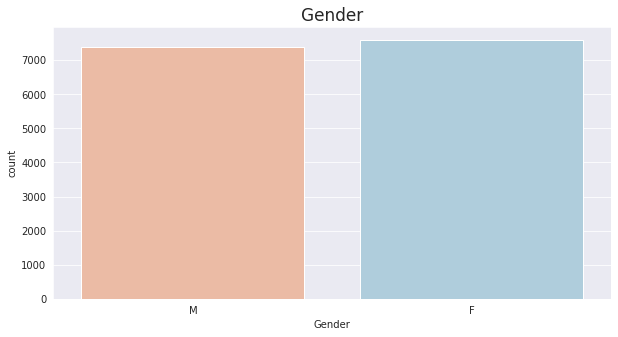

In [ ]:
print(df['Gender'].value_counts())

plt.figure(figsize=(10,5))
ax = sns.countplot(x='Gender', data=df, palette='RdBu')
ax.set_title('Gender', fontsize=17);

**Número de funcionários ativos e inativos**

Vamos visualizar a nossa variável alvo *'left_Company'*, o que ela consegue nos dizer?

Podemos notar que temos **11.428 funcionários ativos** e **3.571 funcionários inativos**.

Logo, temos uma variável alvo desbalanceada. Isso pode ser um problema, 

pois isso pode enviesar os nossos dados a conhecer e reconhecer melhor apenas uma classe, nesse caso, a classe 0. 

0    11428
1     3571
Name: left_Company, dtype: int64


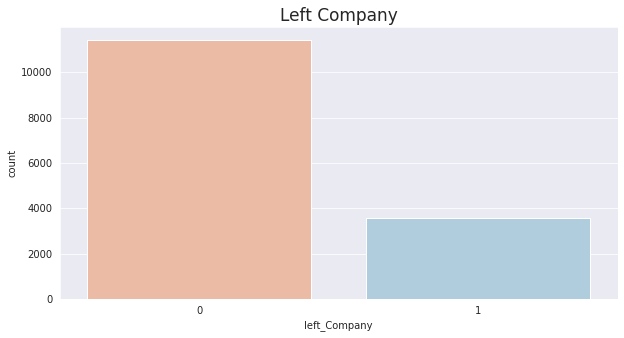

In [ ]:
print(df['left_Company'].value_counts())

plt.figure(figsize=(10,5))
ax = sns.countplot(x='left_Company', data=df, palette='RdBu')
ax.set_title('Left Company', fontsize=17);

Uma outra análise que podemos fazer é da proporção de funcionários Ativos x Inativos. 

Podemos notar que **76.19%** dos dados correspondem a funcionários ativos, 

seguido de **23.80%** de funcionários inativos. 

Lembrando que 0 representa os Ativos e 1 representa os Inativos.

0    76.191746
1    23.808254
Name: left_Company, dtype: float64


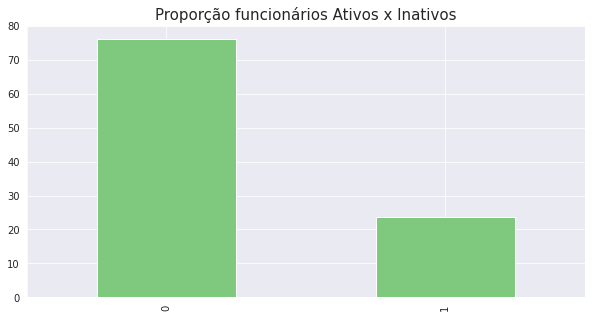

In [ ]:
prop_func = (df['left_Company'].value_counts() / df.shape[0])*100
print(prop_func)

plt.figure(figsize=(10,5))
prop_func.plot(kind='bar')
plt.title('Proporção funcionários Ativos x Inativos', fontsize=15);

**Número de funcionários(as) por Departamento.**

Cinco dos seis departamentos possuem **2500** funcionários(as), restando apenas *Warehouse* com **2.499**.

IT                 2500
Finance            2500
Sales              2500
Human Resources    2500
Operations         2500
Warehouse          2499
Name: Department, dtype: int64


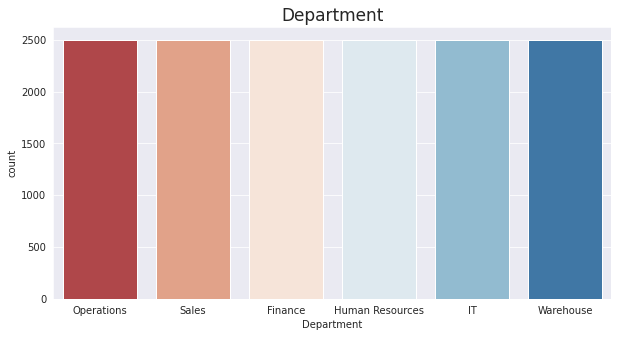

In [ ]:
print(df['Department'].value_counts())

plt.figure(figsize=(10,5))
ax = sns.countplot(x='Department', data=df, palette='RdBu')
ax.set_title('Department', fontsize=17);

**Número de funcionários(as) por Localização.**

O maior número de funcionários(as) são do UK, porém com uma diferença bem pequena em relação aos outros países.

UK           1772
France       1699
Korea        1685
Japan        1669
China        1667
Colombia     1659
Turkey       1639
US           1632
Australia    1577
Name: GEO, dtype: int64


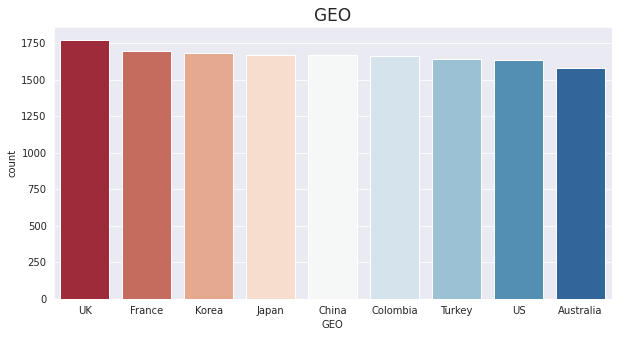

In [ ]:
print(df['GEO'].value_counts())

plt.figure(figsize=(10,5))
ax = sns.countplot(x='GEO', data=df, order=df['GEO'].value_counts().index,
                  palette='RdBu')
ax.set_title('GEO', fontsize=17);

**Número de funcionários(as) por Posição/Título e Gênero**

Neste gráfico, resolvi fazer uma análise de funcionários(as) por posição e por gênero utilizando o parâmetro *hue*.

Podemos notar uma igualdade interessante no gráfico, temos um número bem próximos e mulheres e homens ocupando o mesmo título.

Level 2-4          6889
Level 1            3270
Manager            2420
Senior Manager     1320
Director            660
Senior Director     330
VP                  110
Name: Role, dtype: int64


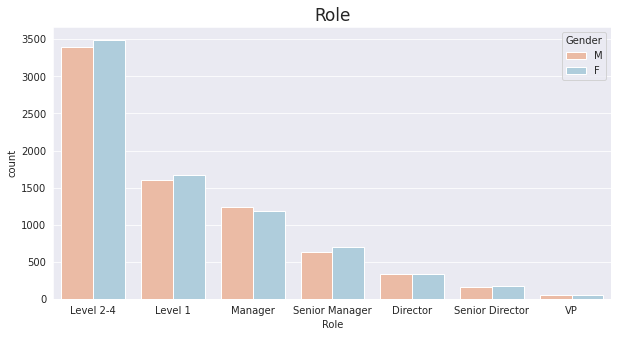

In [ ]:
print(df['Role'].value_counts())

plt.figure(figsize=(10,5))
ax = sns.countplot(x='Role', data=df, hue='Gender', order=df['Role'].value_counts().index,
                   palette='RdBu')
ax.set_title('Role', fontsize=17);

**Número de funcionários(as) por Salário e por Gênero**

Aqui notamos, mais uma vez, algo próximo de uma igualdade relacionado a remuneração de mulheres e homens.

low       7316
medium    6446
high      1237
Name: salary, dtype: int64


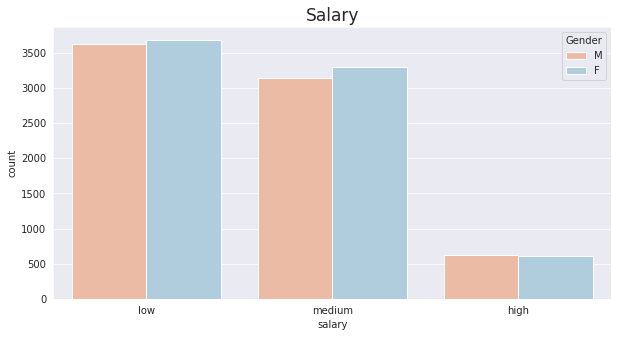

In [ ]:
print(df['salary'].value_counts())

plt.figure(figsize=(10,5))
ax = sns.countplot(x='salary', data=df, hue='Gender', palette='RdBu')
ax.set_title('Salary', fontsize=17);

**Número de funcionários(as) por Sales**

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64


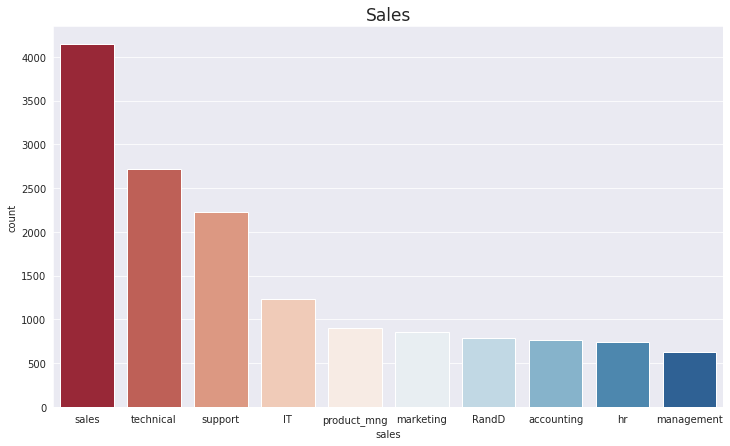

In [ ]:
print(df['sales'].value_counts())

plt.figure(figsize=(12,7))
ax = sns.countplot(x='sales', data=df, order=df['sales'].value_counts().index
                   ,palette='RdBu')
ax.set_title('Sales', fontsize=17);

**Como se distribui os funcionários Ativos e Inativos por GEO?**

0: Ativos
1: Inativos

In [ ]:
df.groupby(['GEO', 'left_Company']).agg({'GEO': 'count'})

GEO
GEO       left_Company      
Australia 0             1228
          1              349
China     0             1264
          1              403
Colombia  0             1251
          1              408
France    0             1296
          1              403
Japan     0             1269
          1              400
Korea     0             1300
          1              385
Turkey    0             1244
          1              395
UK        0             1337
          1              435
US        0             1239
          1              393

**Como se distribui os funcionários ativos e inativos por departamento? Existe um departamento específico que tenha uma taxa maior ou menor de ativos ou inativos?**

Concluimos que o departamento com maior número de Ativos é o de **Warehouse** e o com o menor número de Inativos temos **Finance** e **IT**.

In [ ]:
df.groupby(['Department', 'left_Company']).agg({'Department': 'count'})

Department
Department      left_Company            
Finance         0                   1906
                1                    594
Human Resources 0                   1904
                1                    596
IT              0                   1906
                1                    594
Operations      0                   1901
                1                    599
Sales           0                   1902
                1                    598
Warehouse       0                   1909
                1                    590

**Como se distribui as posições de trabalho (Role) dos Ativos e Inativos?**

Notamos que a posição **Level 2-4** possui o maior número de Ativos, mas também o maior número de Inativos.

In [ ]:
df.groupby(['Role', 'left_Company']).agg({'Role': 'count'})

Role
Role            left_Company      
Director        0              491
                1              169
Level 1         0             2472
                1              798
Level 2-4       0             5254
                1             1635
Manager         0             1863
                1              557
Senior Director 0              245
                1               85
Senior Manager  0             1023
                1              297
VP              0               80
                1               30

**Qual o nível médio de salário por GEO?**


In [ ]:
df.groupby(['GEO', 'salary']).agg({'salary': 'count'})

salary
GEO       salary        
Australia high       136
          low        770
          medium     671
China     high       138
          low        777
          medium     752
Colombia  high       129
          low        792
          medium     738
France    high       155
          low        806
          medium     738
Japan     high       117
          low        842
          medium     710
Korea     high       137
          low        862
          medium     686
Turkey    high       132
          low        834
          medium     673
UK        high       147
          low        864
          medium     761
US        high       146
          low        769
          medium     717

## **Pré Processamento dos Dados**

O pré processamento de dados é uma etapa de enorme importância na hora de construir um modelo de Machine Learning. 


Uma das coisas que precisamos prestar atenção é que o nosso dataset possui 63 colunas, ou seja, ele possui 63 dimensões. Ter um dataset com muitas dimensões pode acarretar em alguns problemas, como por exemplo, o algoritmo pode acabar se sobreajustando aos dados, além de levar mais tempo para treinar o nosso modelo.

Para inciar nosso processo de pré processamento, eu irei eliminar algumas colunas que não julgo como fundamentais para o modelo. Por exemplo, as colunas **ID** e **Name** não trazem informações interessantes quando se trata de construir um modelo de classificação.

Outras colunas que também podemos eliminar, são as colunas que possuem uma alta porcentagem de dados ausentes. Como já foi dito, existem técnicas e ferramentas para se tratar dados ausentes, mas quando se tem uma de um enorme volume deles em uma mesma coluna, o apropriado é elimina-los. Esse caso se aplica as seguintes colunas:


*   **Rising_Star**: 99.85% NaN 
*   **Critical**: 96.79% NaN
*   **CSR Factor**: 88.57% NaN
*   **Men_Leave**: 67.56% NaN
*   **Women_Leave**: 49.35% NaN

In [ ]:
df.drop(['ID', 'Name', 'Rising_Star', 'Critical', 'CSR Factor', 'Men_Leave', 
         'Women_Leave'], axis=1, inplace=True)

In [ ]:
#visualizando o dataframe após a eliminar as colunas
df.head()

,Department,GEO,Role,Will_Relocate,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,EMP_Sat_OnPrem_3,EMP_Sat_OnPrem_4,EMP_Sat_OnPrem_5,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,promotion_last_5years,sales,salary,Gender,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
0,Operations,US,VP,0,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,3,168,3,1,0,0,sales,low,M,5,4,3,1,1,1,1,2,1,2,4,2,2,2,2,2,2,1,5,1841,61,9
1,Sales,UK,Senior Director,0,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,5,159,2,0,0,0,accounting,low,F,58,3,3,4,3,2,1,2,1,2,2,1,4,1,3,2,5,1,5,1990,90,8
2,Finance,France,Senior Director,0,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,2,282,3,0,0,0,product_mng,medium,F,42,2,4,1,3,1,1,2,2,1,5,1,2,5,2,2,4,4,4,3193,80,8
3,Human Resources,China,Senior Director,0,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,4,278,4,1,0,0,product_mng,high,M,37,3,1,4,5,2,1,2,1,1,1,2,5,1,1,2,4,4,1,3248,77,6
4,IT,Korea,Director,0,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,6,256,5,0,0,0,sales,low,F,6,4,5,4,5,1,1,2,1,1,4,1,5,3,5,1,2,5,4,3149,80,10


In [ ]:
#verificando novamente a exclusão das colunas
df.shape[1]

55

As demais colunas que apresentam valores NaN, serão tratadas com a técnica de imputação de dados. Nesse caso, escolhi imputar os dados com a mediana correspondente a cada coluna que possui valores nulos.


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

In [ ]:
#selecionando apenas colunas do tipo int e float para a imputação
df_num = df.select_dtypes(exclude=['object'])

#fazendo a transformação com o fit_transform 
#e começando a construir um novo df para os dados pós pre processamento
X_num = imputer.fit_transform(df_num)
df_num_input = pd.DataFrame(X_num, index=df_num.index, columns=df_num.columns)

Os algoritmos de Machine Learning perfomam melhor com dados numéricos, então precisamos transformar os dados categóricos em numéricos. Assim, transformamos as colunas em binárias.

In [ ]:
#selecionaando apenas colunas do tipo object
df_cat = df.select_dtypes(include=['object'])

#aplicando a técnica de encoding
df_cat = pd.get_dummies(df_cat, drop_first=True)

In [ ]:
#concatenando os dataframes e assim temos um dataframe preparado para a construção do modelo
df_prepared = pd.concat([df_num_input, df_cat], axis=1)
df_prepared.head()

,Will_Relocate,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,EMP_Sat_OnPrem_3,EMP_Sat_OnPrem_4,EMP_Sat_OnPrem_5,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,promotion_last_5years,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest),Department_Human Resources,Department_IT,Department_Operations,Department_Sales,Department_Warehouse,GEO_China,GEO_Colombia,GEO_France,GEO_Japan,GEO_Korea,GEO_Turkey,GEO_UK,GEO_US,Role_Level 1,Role_Level 2-4,Role_Manager,Role_Senior Director,Role_Senior Manager,Role_VP,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium,Gender_M
0,0.0,3.0,6.0,6.0,0.4,3.0,3.0,4.0,3.0,5.0,2.0,3.0,2.0,3.0,2.0,5.0,5.0,4.0,4.0,3.0,0.36,3.0,168.0,3.0,1.0,0.0,0.0,5.0,4.0,3.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,5.0,1841.0,61.0,9.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
1,0.0,3.0,6.0,6.0,0.4,3.0,3.0,4.0,3.0,5.0,2.0,3.0,2.0,3.0,2.0,5.0,5.0,4.0,4.0,3.0,0.36,5.0,159.0,2.0,0.0,0.0,0.0,58.0,3.0,3.0,4.0,3.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,4.0,1.0,3.0,2.0,5.0,1.0,5.0,1990.0,90.0,8.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.0,3.0,6.0,6.0,0.4,3.0,3.0,4.0,3.0,5.0,2.0,3.0,2.0,3.0,2.0,5.0,5.0,4.0,4.0,3.0,0.36,2.0,282.0,3.0,0.0,0.0,0.0,42.0,2.0,4.0,1.0,3.0,1.0,1.0,2.0,2.0,1.0,5.0,1.0,2.0,5.0,2.0,2.0,4.0,4.0,4.0,3193.0,80.0,8.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,0.0,3.0,6.0,6.0,0.4,3.0,3.0,4.0,3.0,5.0,2.0,3.0,2.0,3.0,2.0,5.0,5.0,4.0,4.0,3.0,0.36,4.0,278.0,4.0,1.0,0.0,0.0,37.0,3.0,1.0,4.0,5.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,5.0,1.0,1.0,2.0,4.0,4.0,1.0,3248.0,77.0,6.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,0.0,3.0,6.0,6.0,0.4,3.0,3.0,4.0,3.0,5.0,2.0,3.0,2.0,3.0,2.0,5.0,5.0,4.0,4.0,3.0,0.36,6.0,256.0,5.0,0.0,0.0,0.0,6.0,4.0,5.0,4.0,5.0,1.0,1.0,2.0,1.0,1.0,4.0,1.0,5.0,3.0,5.0,1.0,2.0,5.0,4.0,3149.0,80.0,10.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


# **Construindo o Modelo com Random Forest**

In [ ]:
from sklearn.model_selection import train_test_split

SEED = 42
np.random.seed(SEED)

#separando as variáveis independente e dependente
X = df_prepared.drop('left_Company', axis=1)
y = df_prepared['left_Company']

#separando dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y ,
                                                   random_state=SEED)

Para facilitar irei construir um pipeline, assim podemos colocar todo os steps que queremos que seja aplicado, até a chegado ao estimador.

Como foi dito, temos uma alta dimensionalidade de dados, para solucionar esse problema irei aplicar a técnica de Principal Component Analysis (PCA).

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

rf_model = Pipeline(steps=[                                                                  
    ('PCA', PCA(n_components=2)),
    ('rf_clf', RandomForestClassifier(n_estimators=10, random_state=SEED))                   
])

#treinando o modelo
rf_model.fit(X_train, y_train)

#fazendo as previsões utilizando o X_test
y_pred_rf = rf_model.predict(X_test)
y_pred_rf

array([0., 0., 0., ..., 0., 1., 0.])

In [ ]:
#o predict_proba nos dá a probalidade de cada classe pertencer àquela instância
#aqui mostro as 5 primeiras instâncias/linhas
rf_model.predict_proba(X_test)[0:5]

array([[1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.7, 0.3],
       [1. , 0. ]])

In [ ]:
#descobrindo a acurácia(os acertos) do nosso modelo 
from sklearn.metrics import accuracy_score

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'[Acurácia Random Forest]: {accuracy_rf}')

[Acurácia Random Forest]: 0.9217777777777778


Utilizar somente a acurácia para descobrir se o modelo é bom, não é melhor opção, ainda mais em um modelo de classificação. Então utilizarei a técnica de **Validação Cruzada** que nos ajudará a validar o nosso modelo.

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

SEED = 42
np.random.seed(SEED)

#aleatorizando os nosso dados e fazendo a validação cruzada
cv = StratifiedKFold(n_splits = 5, shuffle=True)
results_cv_rf = cross_validate(rf_model, X, y, cv=cv, return_train_score=False)

mean_cv_rf = results_cv_rf['test_score'].mean()
std_cv_rf = results_cv_rf['test_score'].std()
print('Accuracy médio RF - com CV: %.2f' % (mean_cv_rf * 100))
print('Accuracy intervalo RF - com CV: [%.2f, %.2f]' % (
    (mean_cv_rf - 2 *std_cv_rf) * 100, (mean_cv_rf + 2 * std_cv_rf) * 100))

Accuracy médio RF - com CV: 92.32
Accuracy intervalo RF - com CV: [91.45, 93.19]


O resultado foi semelhante a da acurácia sem a Validação Cruzada, isso é um bom sinal de que estamos no caminho certo...

## **Ajustando o Modelo**

Uma maneira de descobrir se o modelo está tendo a melhor perfomance que ele pode ter, é alterar os hiperparâmetros do algoritmo utilizado até encontrar uma ótima combinação. 

E é exatamente isso que GridSearchCV faz. Só precisamos passar quais hiperparâmetros que desejamos que ele experimente e quais valores tentar, e ele avaliará todas as combinações de valores possíveis por meio de validação cruzada.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

SEED = 42
np.random.seed(SEED)
cv = StratifiedKFold(n_splits = 5, shuffle=True)

#setando os parâmetros que queremos testar
param_grid_rf = [
    {'rf_clf__n_estimators':[10, 100], 'rf_clf__criterion': ['gini', 'entropy'], 'rf_clf__class_weight':['balanced']},
    {'rf_clf__bootstrap':[False], 'rf_clf__n_estimators':[10, 100], 'rf_clf__criterion': ['gini', 'entropy']}  
]

grid_search_rf = GridSearchCV(rf_model, param_grid_rf, 
                           cv=StratifiedKFold(n_splits = 5, shuffle=True), 
                           scoring='accuracy')
#treinamento com o GriSearch
grid_search_rf.fit(X_train, y_train)

#resultados obtidos com o treinamento de cada parâmetro
results_grid_rf = pd.DataFrame(grid_search_rf.cv_results_)
results_grid_rf.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rf_clf__class_weight,param_rf_clf__criterion,param_rf_clf__n_estimators,param_rf_clf__bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.154375,0.007739,0.009268,0.001336,balanced,gini,10,NaN,"{'rf_clf__class_weight': 'balanced', 'rf_clf__...",0.925238,0.926190,0.927143,0.927619,0.923773,0.925993,0.001379,2
1,0.736714,0.011848,0.040530,0.002262,balanced,gini,100,NaN,"{'rf_clf__class_weight': 'balanced', 'rf_clf__...",0.926190,0.920476,0.925238,0.922381,0.930919,0.925041,0.003573,3
2,0.201269,0.011114,0.007584,0.000191,balanced,entropy,10,NaN,"{'rf_clf__class_weight': 'balanced', 'rf_clf__...",0.924762,0.925714,0.922857,0.927619,0.930919,0.926374,0.002743,1
3,1.196042,0.019851,0.038682,0.000484,balanced,entropy,100,NaN,"{'rf_clf__class_weight': 'balanced', 'rf_clf__...",0.927143,0.917619,0.925714,0.921905,0.929490,0.924374,0.004180,4
4,0.179222,0.005353,0.007766,0.000228,NaN,gini,10,False,"{'rf_clf__bootstrap': False, 'rf_clf__criterio...",0.922381,0.922381,0.925714,0.920952,0.926632,0.923612,0.002175,5


In [ ]:
#descobrindo os melhores parâmetros
grid_search_rf.best_params_

{'rf_clf__class_weight': 'balanced',
 'rf_clf__criterion': 'entropy',
 'rf_clf__n_estimators': 10}

In [ ]:
#treinando o RandomForest agora com os melhores parâmetros
best_est_rf = grid_search_rf.best_estimator_
best_est_rf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('PCA',
                 PCA(copy=True, iterated_power='auto', n_components=2,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('rf_clf',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight='balanced',
                                        criterion='entropy', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_s

In [ ]:
y_pred_acc_rf= best_est_rf.predict(X_test)

## **Métricas de Avaliação do Modelo - Random Forest**

Avaliamos o modelo de classificação utilizando a acurácia e obtemos uma acurácia média de 92%. Porém, em problemas de classificação utilizar somente a acurácia para saber se nosso modelo está performando bem não é muito correto. Temos outras métricas que podem nos auxiliar na hora de analisar se um modelo está obtendo um bom resultado. 

Temos o precision(precisão) que nos diz o quão preciso está sendo o nosso modelo na hora de acertar a classificação. O recall(revocação) é a fração de instâncias relevantes que são recuperadas. E o f1-score é uma média harmônica de ambos.

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print('Accuracy Score: ' + str(accuracy_score(y_test,y_pred_acc_rf)))
print('Precision Score: ' + str(precision_score(y_test,y_pred_acc_rf)))
print('Recall Score: ' + str(recall_score(y_test,y_pred_acc_rf)))
print('F1 Score: ' + str(f1_score(y_test,y_pred_acc_rf)))

Accuracy Score: 0.92
Precision Score: 0.87940234791889
Recall Score: 0.76937441643324
F1 Score: 0.8207171314741036


**Matriz de Confusão**

A Matriz de Confusão é também utilizada para avaliar a perfomance do modelo. 

Essa é a estrutura:

[*Verdadeiros Negativos, Falsos Positivos*

*Falsos Negativos, Verdadeiros Positivos]*

[[3316  113]
 [ 247  824]]


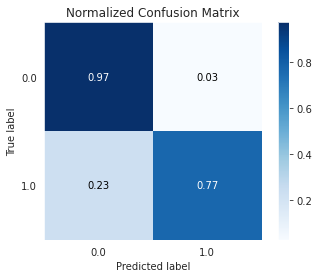

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print(confusion_matrix(y_test, y_pred_acc_rf))

# plotando a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_acc_rf, normalize=True);

O classification_report nos traz um resumo das principais métricas que já vimos anteriormente. 

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_acc_rf))

              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      3429
         1.0       0.88      0.77      0.82      1071

    accuracy                           0.92      4500
   macro avg       0.91      0.87      0.88      4500
weighted avg       0.92      0.92      0.92      4500



**Feature Importances**

Permutation Feature Importance é uma técnica de inspeção de modelo que pode ser usada para qualquer estimador ajustado quando os dados são tabulares. Este procedimento quebra a relação entre o recurso e o destino, portanto, a queda na pontuação do modelo é um indicativo de quanto o modelo depende do recurso. 

In [ ]:
from sklearn.inspection import permutation_importance

r = permutation_importance(best_est_rf, X_train, y_train,
                            random_state=SEED)

for i in r.importances_mean.argsort()[::-1]:
     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
         print(f'{df_prepared.columns[i]:<8}'
               f' -> {r.importances_mean[i]:.3f}'
               f' +/- {r.importances_std[i]:.3f}')

Emp_Collaborative_5 -> 0.357 +/- 0.002
average_montly_hours -> 0.188 +/- 0.002
promotion_last_5years -> 0.049 +/- 0.001
Sensor_StepCount -> 0.035 +/- 0.001
Sensor_Heartbeat(Average/Min) -> 0.004 +/- 0.000
number_project -> 0.003 +/- 0.000
EMP_Sat_Remote_5 -> 0.002 +/- 0.000
EMP_Sat_Remote_3 -> 0.002 +/- 0.000
EMP_Sat_Remote_2 -> 0.002 +/- 0.000
EMP_Engagement_1 -> 0.001 +/- 0.000
time_spend_company -> 0.001 +/- 0.000
EMP_Sat_Remote_1 -> 0.001 +/- 0.000
EMP_Engagement_2 -> 0.001 +/- 0.000
EMP_Sat_OnPrem_5 -> 0.001 +/- 0.000
EMP_Sat_Remote_4 -> 0.001 +/- 0.000
EMP_Engagement_4 -> 0.000 +/- 0.000
EMP_Engagement_5 -> 0.000 +/- 0.000
Emp_Title -> 0.000 +/- 0.000
Emp_Work_Status_3 -> 0.000 +/- 0.000
Emp_Work_Status_4 -> 0.000 +/- 0.000
Emp_Competitive_2 -> 0.000 +/- 0.000
Emp_Collaborative_1 -> 0.000 +/- 0.000
Emp_Collaborative_3 -> 0.000 +/- 0.000
Emp_Identity -> 0.000 +/- 0.000
Emp_Competitive_3 -> 0.000 +/- 0.000
Emp_Competitive_4 -> 0.000 +/- 0.000
last_evaluation -> 0.000 +/- 0.000
Perc

# **Construindo o Modelo com KNeighbors**

O KNeighbors é um classificador que implementa a votação de k-vizinhos mais próximos a cada instância.

Iremos repetir os mesmos passos aqui para a construção desse novo modelo.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

knn_model = Pipeline(steps=[                                                                  
    ('PCA', PCA(n_components=2)),
    ('knn_clf', KNeighborsClassifier())                   
])

knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)
y_pred_knn

array([0., 0., 0., ..., 0., 1., 0.])

In [ ]:
knn_model.predict_proba(X_test)[0:5]

array([[1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ]])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'[Acurácia KNN]: {accuracy_knn}')

[Acurácia KNN]: 0.9111111111111111


**Validação Cruzada**

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

SEED = 42
np.random.seed(SEED)

cv = StratifiedKFold(n_splits = 5, shuffle=True)
results_cv_knn = cross_validate(knn_model, X, y, cv=cv, return_train_score=False)

mean_cv_knn = results_cv_knn['test_score'].mean()
std_cv_knn = results_cv_knn['test_score'].std()
print('Accuracy médio KNN - com CV: %.2f' % (mean_cv_knn * 100))
print('Accuracy intervalo KNN - com CV = [%.2f, %.2f]' % (
    (mean_cv_knn - 2 *std_cv_knn) * 100, (mean_cv_knn + 2 * std_cv_knn) * 100))

Accuracy médio KNN - com CV: 92.10
Accuracy intervalo KNN - com CV = [91.13, 93.07]


Pela acurácia podemos notar que esse modelo está tendo um desempenho bem semelhante ao anterior.

## **Ajustando o Modelo**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

SEED = 42
np.random.seed(SEED)
cv = StratifiedKFold(n_splits = 5, shuffle=True)

param_grid_knn = [
    {'knn_clf__n_neighbors': [3, 5, 7], 'knn_clf__weights': ['uniform', 'distance']},
]  

grid_search_knn = GridSearchCV(knn_model, param_grid_knn, 
                           cv=StratifiedKFold(n_splits = 5, shuffle=True), 
                           scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

results_grid_knn = pd.DataFrame(grid_search_knn.cv_results_)
results_grid_knn.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn_clf__n_neighbors,param_knn_clf__weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.060454,0.001430,0.088957,0.002768,3,uniform,"{'knn_clf__n_neighbors': 3, 'knn_clf__weights'...",0.920476,0.916190,0.922381,0.921905,0.920438,0.920278,0.002184,1
1,0.058805,0.001261,0.010990,0.000049,3,distance,"{'knn_clf__n_neighbors': 3, 'knn_clf__weights'...",0.917143,0.915238,0.923333,0.920000,0.917103,0.918564,0.002829,4
2,0.059953,0.004563,0.087190,0.000640,5,uniform,"{'knn_clf__n_neighbors': 5, 'knn_clf__weights'...",0.919524,0.917619,0.917619,0.918571,0.917103,0.918087,0.000861,5
3,0.058209,0.000351,0.012034,0.000066,5,distance,"{'knn_clf__n_neighbors': 5, 'knn_clf__weights'...",0.918095,0.915238,0.917619,0.925238,0.919009,0.919040,0.003340,3
4,0.058362,0.000708,0.089723,0.001789,7,uniform,"{'knn_clf__n_neighbors': 7, 'knn_clf__weights'...",0.917619,0.916667,0.917143,0.918571,0.919009,0.917802,0.000872,6


In [ ]:
grid_search_knn.best_params_

{'knn_clf__n_neighbors': 3, 'knn_clf__weights': 'uniform'}

In [ ]:
best_est_knn = grid_search_knn.best_estimator_
best_est_knn.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('PCA',
                 PCA(copy=True, iterated_power='auto', n_components=2,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('knn_clf',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=3, p=2,
                                      weights='uniform'))],
         verbose=False)

In [ ]:
y_pred_acc_knn= best_est_knn.predict(X_test)

In [ ]:
print('Accuracy Score: ' + str(accuracy_score(y_test,y_pred_acc_knn)))
print('Precision Score: ' + str(precision_score(y_test,y_pred_acc_knn)))
print('Recall Score: ' + str(recall_score(y_test,y_pred_acc_knn)))
print('F1 Score: ' + str(f1_score(y_test,y_pred_acc_knn)))

Accuracy Score: 0.9148888888888889
Precision Score: 0.8405940594059406
Recall Score: 0.7927170868347339
F1 Score: 0.8159538683325324


## **Métricas de Classificação do Modelo - KNN**

[[3268  161]
 [ 222  849]]


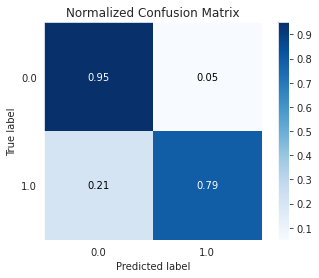

In [ ]:
print(confusion_matrix(y_test, y_pred_acc_knn))

# plotando a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_acc_knn, normalize=True);

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_acc_knn))

              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94      3429
         1.0       0.84      0.79      0.82      1071

    accuracy                           0.91      4500
   macro avg       0.89      0.87      0.88      4500
weighted avg       0.91      0.91      0.91      4500



Comparando a perfomance dos dois modelos:

Ambos tiveram o desempenho parecido como podemos notar mais uma vez.

In [ ]:
print('Métricas Random Forest:\n')
print('Accuracy Score: ' + str(accuracy_score(y_test,y_pred_acc_rf)))
print('Precision Score: ' + str(precision_score(y_test,y_pred_acc_rf)))
print('Recall Score: ' + str(recall_score(y_test,y_pred_acc_rf)))
print('F1 Score KNN: ' + str(f1_score(y_test,y_pred_acc_rf)))
print('------------------------------------')

print('Métricas KNN:\n')
print('Accuracy Score: ' + str(accuracy_score(y_test,y_pred_acc_knn)))
print('Precision Score: ' + str(precision_score(y_test,y_pred_acc_knn)))
print('Recall Score: ' + str(recall_score(y_test,y_pred_acc_knn)))
print('F1 Score KNN: ' + str(f1_score(y_test,y_pred_acc_knn)))

Métricas Random Forest:

Accuracy Score: 0.92
Precision Score: 0.87940234791889
Recall Score: 0.76937441643324
F1 Score KNN: 0.8207171314741036
------------------------------------
Métricas KNN:

Accuracy Score: 0.9148888888888889
Precision Score: 0.8405940594059406
Recall Score: 0.7927170868347339
F1 Score KNN: 0.8159538683325324
